<br>

# Davis Southern Women

DATA 620  
Bonnie Cooper, George Cruz Deschamps, Rob Hodde  

<br><br>

## Introduction

The Davis Southern Women data set is a small collection that describes the social connectivity of 18 Southern women during the 1930s via thier attendence records for 14 social events. The data consists of a two-mode 'woman by event' structure and has been analyzed extensively to reveal it's network properties$^2$.  

This notebook will start with a naive view of the data, from which it is difficult to discern any patterns. Following, an analysis that shadows the approach of Breiger (1974)$^1$ in his study, 'The duality of persons and groups.' will be used to tease out the existence of subgroups within the social network

## Importing the Davis Southern Women data set

Setting up our python environment by importing the libraries used throughout the analysis.  

Following, we import the [Davis Southern Women data set](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html) from `networkx`:  

In [ ]:
# import python libraries used in analysis
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

Importing the graph network

In [2]:
# import the Davis Southern Women graph
G = nx.davis_southern_women_graph()
# generate two lists for the women and the events nodes respectively
women = G.graph["top"]
events = G.graph["bottom"]

a naive view of the Davis Southern Women data set

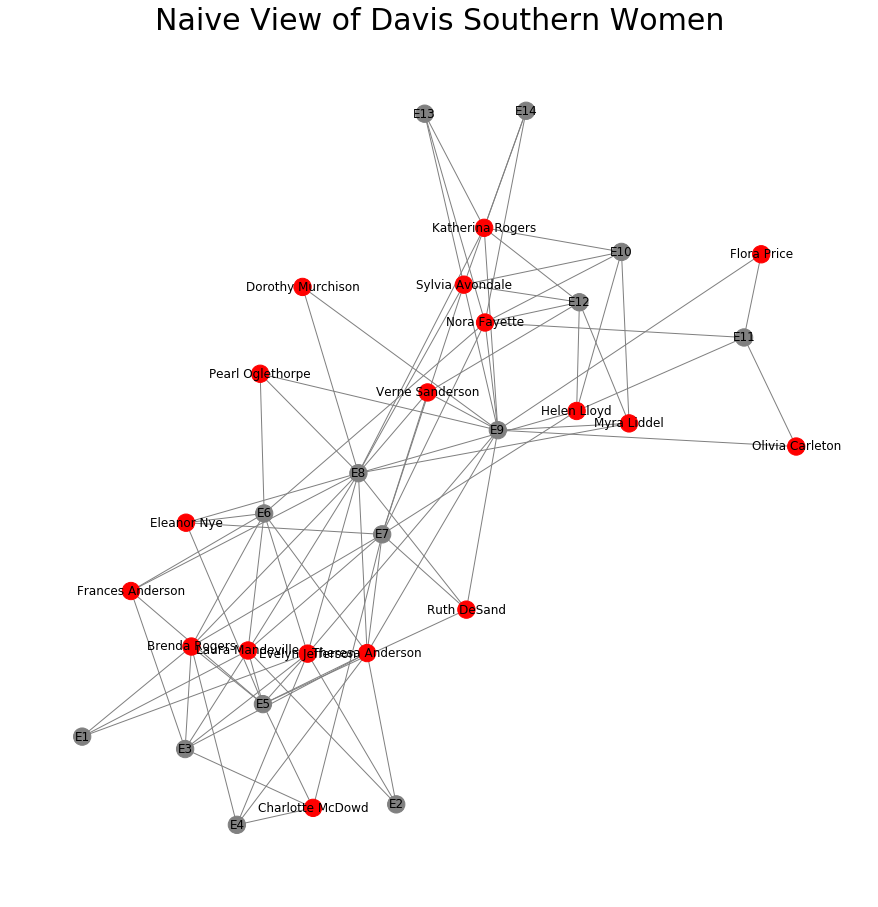

In [3]:
plt.figure(figsize=(12,12))
color = [ "red" if n in women else "gray" for n in G.nodes()]
pos = nx.spring_layout(G, seed=648) 
nx.draw(G, pos, node_color=color, edge_color="gray", with_labels=True)
plt.title('Naive View of Davis Southern Women', fontsize=30)
plt.show()

Inspecting the figure above, it is apparent that the mayority of nodes are densely connected. There are a few nodes in the periphery that have fewer edges, however, apart from this, it is difficult to notice any definitive patterns formed between the women and events.  

To learn more about this network, we will follow the approach of a much earlier study from R. Breiger *The Duality of Persons ad Groups* (1974)$^1$. Breiger broke the bipartite network into two seperate networks: 1) a network of 'women to women' where edges are established between women who attended the same events and 1) a network of 'events to events' where edges are established between events with shared attendents. Breiger then noticed that several of the event nodes were densely connected. By eliminated these connections, Breiger identified two subgroups within the Davis Southern Women data.  

This notebook will follow the approach of Breiger:  
1. visualize and analyze the one-mode networks within the bipartite graph
2. identify and trim densely connected nodes
3. examine the effects on the one-mode networks
3. revisit the bipartite graph

**Goal**: Identify sub-cliques within the bipartite network

<br>

## 1) Visualize & analyze one-mode networks

The following code will build, visualize and briefly analyze the connectivity of the one-mode networks that can be derived from the Davis Southern Women data set: the 'women to women' network and the 'events to events' network

### 'Women to women' network

create a network of women where edges are established if the women have attended the same events  

steps:
1. build a dictionary that holds values for every event a woman attended
2. define edges between women that have attended the same events
3. visualize the 'women to women' graph network
4. inspecting connectivity & discussion

#### 1) a dictionary of women

In [4]:
# split the edge tuples into a tuple of women and events
split_edges = list(zip(*list( G.edges() ) ) )
#create a dictionary that holds the events each woman attended
women_dict = {}
for woman in women:
    # build a list of events for a specific woman
    her_events = [split_edges[1][idx] for idx,w in enumerate(split_edges[0]) if w == woman ]
    # asign as a value with her name as the key
    women_dict[ woman ] = her_events

In [5]:
# display the dict
women_dict

{'Evelyn Jefferson': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9'],
 'Laura Mandeville': ['E1', 'E2', 'E3', 'E5', 'E6', 'E7', 'E8'],
 'Theresa Anderson': ['E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'],
 'Brenda Rogers': ['E1', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'],
 'Charlotte McDowd': ['E3', 'E4', 'E5', 'E7'],
 'Frances Anderson': ['E3', 'E5', 'E6', 'E8'],
 'Eleanor Nye': ['E5', 'E6', 'E7', 'E8'],
 'Pearl Oglethorpe': ['E6', 'E8', 'E9'],
 'Ruth DeSand': ['E5', 'E7', 'E8', 'E9'],
 'Verne Sanderson': ['E7', 'E8', 'E9', 'E12'],
 'Myra Liddel': ['E8', 'E9', 'E10', 'E12'],
 'Katherina Rogers': ['E8', 'E9', 'E10', 'E12', 'E13', 'E14'],
 'Sylvia Avondale': ['E7', 'E8', 'E9', 'E10', 'E12', 'E13', 'E14'],
 'Nora Fayette': ['E6', 'E7', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'],
 'Helen Lloyd': ['E7', 'E8', 'E10', 'E11', 'E12'],
 'Dorothy Murchison': ['E8', 'E9'],
 'Olivia Carleton': ['E9', 'E11'],
 'Flora Price': ['E9', 'E11']}

#### 2) a graph network where edges are shared events

In [6]:
# helper function to form a 1 mode network from a dictionary that interrelates the bipartite nodes
def add_1mode_edges( node_dict ):
    """
    add edges for a 1mode network (keys of dict) from a dictionary that maps between the 1mode networks
    """
    N = nx.Graph()
    nodes = list( node_dict.keys() )
    # for each node in the nodes:
    for node in nodes:
        nodes = [n for n in nodes if n != node]
        # check against the other women in the list:
        for othernode in nodes:
            shared_nodes = list( set(node_dict[node]) & set(node_dict[othernode]) )
            if len(shared_nodes)>0:
                N.add_edge( node, othernode, weight=len(shared_nodes) ) 
    return N

W = add_1mode_edges( women_dict )

#### 3) Visualizing the Network

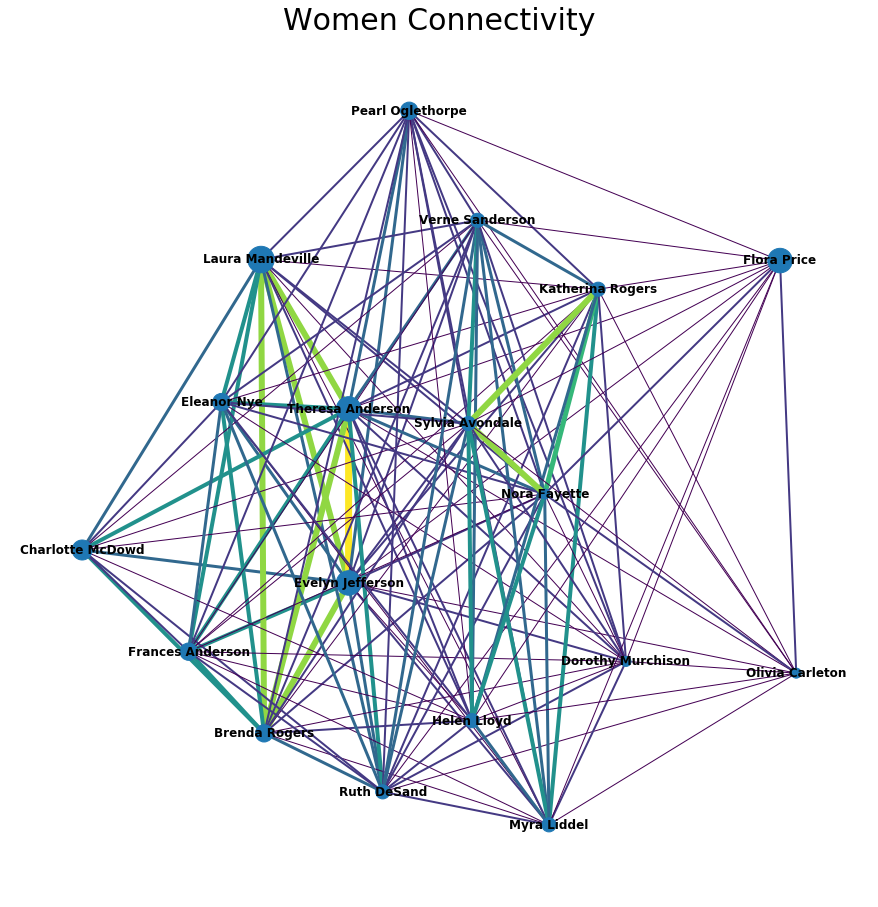

In [7]:
# Visualize the women network where connections are established between women who have attended the same events
plt.figure(figsize=(12,12))
weights = [ edata['weight'] for f, t, edata in W.edges( data=True ) ]
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw_spring(W, width=weights, 
        with_labels=True, 
        font_weight="bold", 
        edge_color=weights,
        node_size=[v * 100 for v in weights] )
plt.title('Women Connectivity', fontsize=30)
plt.show()

Edge color & thickness reflect the number of shared event attendence



#### 4) about connectivity in the women network

In [8]:
print( "Average Node Connectivity: ", nx.average_node_connectivity( W ) )
print( "Number of edges: ", len( list( W.edges ) ) )
print( "Number of possible edges: ", int(18*17/2) )
print( "Percent connectivity: ", round(len( list( W.edges ) )/(18*17/2)*100,2 ), '%' )

Average Node Connectivity:  14.287581699346406
Number of edges:  139
Number of possible edges:  153
Percent connectivity:  90.85 %


In [9]:
degrees = [val for (node, val) in W.degree()]
degrees

[17, 15, 17, 15, 11, 15, 15, 16, 17, 17, 16, 16, 17, 17, 17, 16, 12, 12]

The visualization of the Women network and the output above demonstrate that this network of 18 women is very saturated. Just over 90% of the possible connections between the women are established by shared attendence of social events. Additionally, 7 of the 18 nodes share edges with all other women in the network while only 3 nodes are lacking connectivity to more than two other nodes.  
With this level of connectivity, it is very difficult to identify subgroups within the network: "Since everyone is connected to virtually everyone else, identification of subgroupings became problematic."(Breiger 1974)


### Events Network

if edges are defined by shared attendents, what are the connectivity patterns between events?  
the following code follows the same approach used to build the women graph object, but here the roles are reversed: the network nodes will be the events and the edges are established by shared attendence of women.

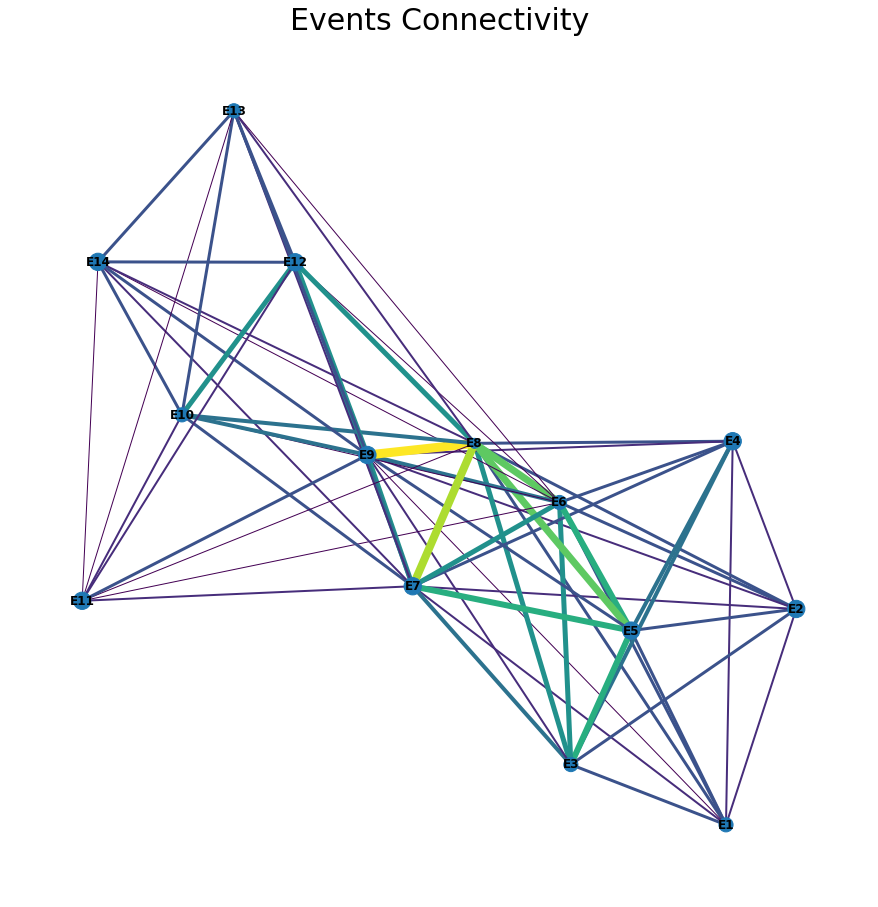

In [10]:
events_dict = {}
for event in events:
    # build a list of women for a specific event
    events_attendents = [split_edges[0][idx] for idx,e in enumerate(split_edges[1]) if e == event ]
    # asign as a value with event name as the key
    events_dict[ event ] = events_attendents

#build the events 1mode network from events_dict
E = add_1mode_edges( events_dict )
            
# Visualize the events network where connections are established between events who have shared attendents
plt.figure(figsize=(12,12))
weights = [ edata['weight'] for f, t, edata in E.edges( data=True ) ]
#pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw_spring(E, width=weights, 
        with_labels=True, 
        font_weight="bold", 
        edge_color=weights,
        node_size=[v * 100 for v in weights] )
plt.title('Events Connectivity', fontsize=30)
plt.show()

Edge color & thickness reflect the number of shared women attendents

<br>

In [11]:
print( "Average Node Connectivity: ", nx.average_node_connectivity( E ) )
print( "Number of edges: ", len( list( E.edges ) ) )
print( "Number of possible edges: ", int(14*13/2) )
print( "Percent connectivity: ", round(len( list( E.edges ) )/(14*13/2)*100,2 ), '%' )

Average Node Connectivity:  7.230769230769231
Number of edges:  66
Number of possible edges:  91
Percent connectivity:  72.53 %


In [12]:
degrees = [val for (node, val) in E.degree()]
degrees

[8, 8, 8, 8, 8, 13, 13, 13, 13, 8, 8, 8, 8, 8]

The 'events to events' network is not as densely connected as the 'women to women' network.  

**Assumption**: "only those events which have zero overlap with at least one other event are likely to separate the women into socially meaningful subgroupings."

If we follow Breiger's assumption, we should eliminate the events which shared attendents to all other events in the network.  

## 2) Identify and trim densely connected nodes

The following code will identify the fully connected event nodes and remove them from the graph

In [13]:
#identify events nodes to remove
events2remove = [node for (node, val) in E.degree() if val==13] #13 event == shared attendents to all other events
events2remove

['E6', 'E7', 'E8', 'E9']

In [14]:
# remove the edges in the bipartite network to the nodes in 'events2remove'
G2 = nx.davis_southern_women_graph()
print( len( list( G2.edges() ) ) )
for node in events2remove:
    G2.remove_node(node)
print( len( list( G2.edges() ) ) )

89
45


In [15]:
# is the graph network connected?
nx.is_connected( G2 )

False

<br>

## 3) Examine the effects on the one-mode network

With the fully connected events nodes removed from the Davis Southern Women data, we see that the network is no longer connected.  

Let's examine the subgroups of women that remain connected after trimming the events

In [16]:
# seperate into graph components
comps = nx.connected_components( G2 )
sizes = [len(c) for c in sorted(comps, key=len, reverse=True)]
print( 'There are ' + str(len( sizes )) + ' graph components' )
print( 'Here are the sizes:')
sizes

There are 4 graph components
Here are the sizes:


[13, 13, 1, 1]

In [17]:
# subgraphs is a list of subgraphs in G2
subgraphs = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]

### Visualize the 'women to women' network for the 2 largest subgraphs

(the code is similar as in above sections )

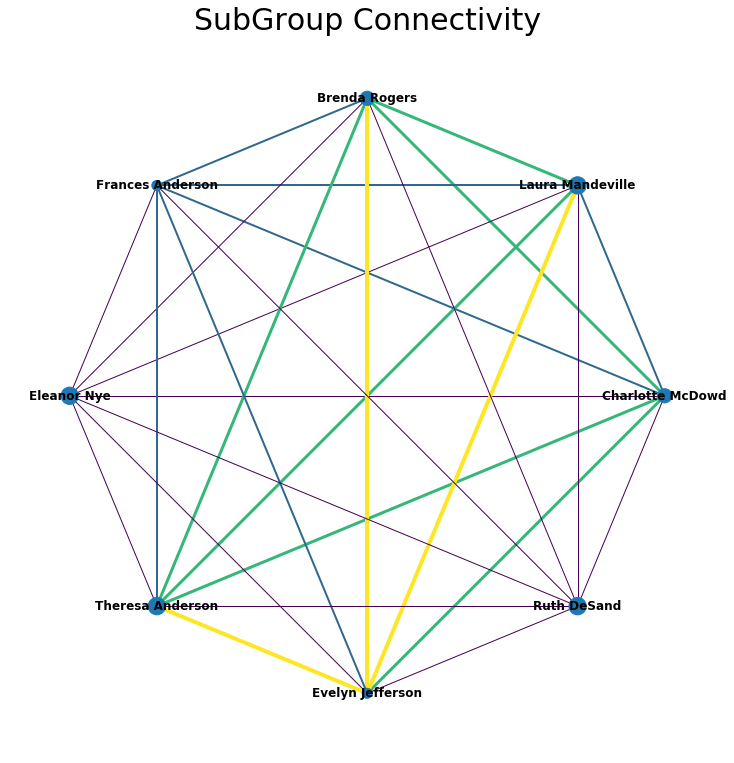

In [18]:
subw = [ w for w in subgraphs[0].nodes() if len(w)>4 ]

split_edges = list(zip(*list( subgraphs[0].edges() ) ) )

sub_dict = {}
for w in subw:
    addevents = []
    for edge in subgraphs[0].edges():
        if len( edge[0] ) > 4:
            if edge[0] == w:
                addevents.append( edge[1] )
        elif len( edge[0] ) < 4:
            if edge[1] == w:
                addevents.append( edge[0] )
        sub_dict[ w ] = addevents

#instantiate an empty graph object
sub = add_1mode_edges( sub_dict )

            
# Visualize the events network where connections are established between events who have shared attendents
plt.figure(figsize=(10,10))
weights = [ edata['weight'] for f, t, edata in sub.edges( data=True ) ]
#pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw_circular(sub, width=weights, 
        with_labels=True, 
        font_weight="bold", 
        edge_color=weights,
        node_size=[v * 100 for v in weights] )
plt.title('SubGroup Connectivity', fontsize=30)
plt.show()

Edge color & thickness reflect the number of shared event attendence

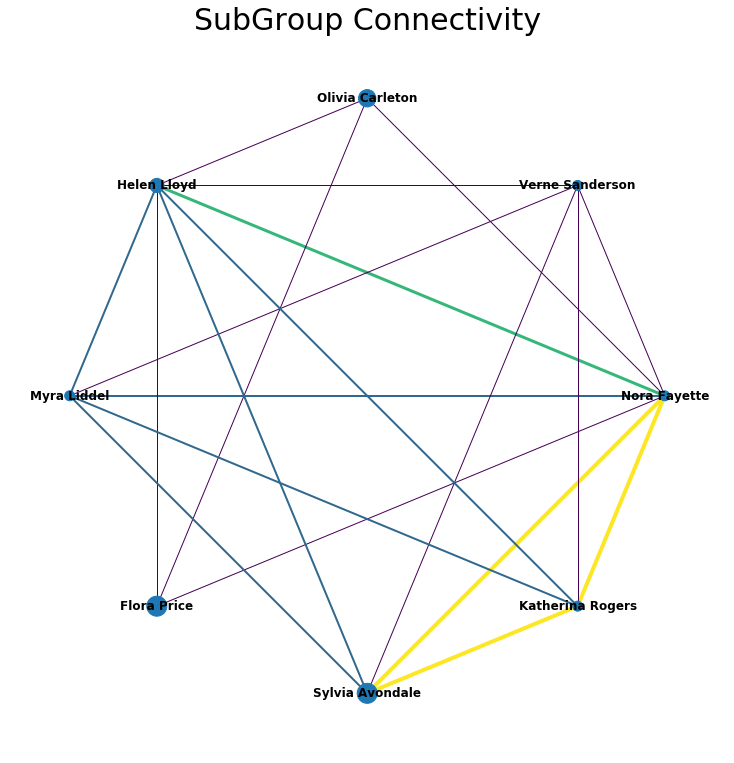

In [19]:
subw2 = [ w for w in subgraphs[2].nodes() if len(w)>4 ]

split_edges = list(zip(*list( subgraphs[2].edges() ) ) )

sub_dict = {}
for w in subw2:
    addevents = []
    for edge in subgraphs[2].edges():
        if len( edge[0] ) > 4:
            if edge[0] == w:
                addevents.append( edge[1] )
        elif len( edge[0] ) < 4:
            if edge[1] == w:
                addevents.append( edge[0] )
        sub_dict[ w ] = addevents

#instantiate an empty graph object
sub =  add_1mode_edges( sub_dict )

            
# Visualize the events network where connections are established between events who have shared attendents
plt.figure(figsize=(10,10))
weights = [ edata['weight'] for f, t, edata in sub.edges( data=True ) ]
#pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw_circular(sub, width=weights, 
        with_labels=True, 
        font_weight="bold", 
        edge_color=weights,
        node_size=[v * 100 for v in weights] )
plt.title('SubGroup Connectivity', fontsize=30)
plt.show()

Edge color & thickness reflect the number of shared event attendence

<br>

### **Main Finding**: 

By removing the fully connected events nodes two distinct cliques of 'women to women' connections are identified. In both of the graphs, the color and thickness of the edge signifies the number of shared events between the women nodes (thin purple << thick yellow)

## 4) Revisit the bipartite graph

Two cliques were successfully identified in the Davis Southern Women data set.  
Here we revisualize the original bipartite network and color the nodes based on clique membership

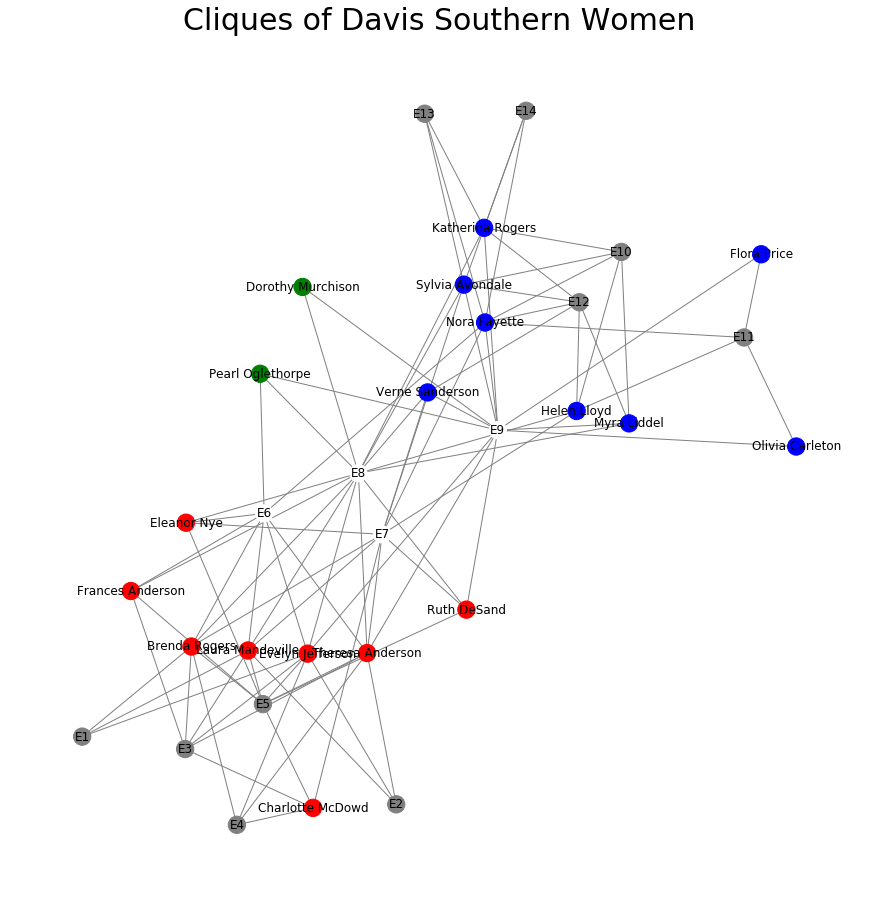

In [20]:
plt.figure(figsize=(12,12))
color = []
for node in G.nodes():
    if node in subw:
        color.append('red')
    elif node in subw2:
        color.append('blue')
    elif node in events2remove:
        color.append('white')
    elif node in events:
        color.append('gray')
    else:
        color.append('green')
pos = nx.spring_layout(G, seed=648) 
nx.draw(G, pos, node_color=color, edge_color="gray", with_labels=True)
plt.title('Cliques of Davis Southern Women', fontsize=30)
plt.show()

The figure above incorporates the information derived in the sections of code above

### Summary

* women have different social event attendence behaviors:
    * Most women attend the widely attended events E6, E7, E8& E9 as well as a subset of other events
    * a few women (Green nodes) only attended the widely attended events
* Some social events are more widely attended:
    * events E6, E7, E8 & E9 were attended by women whom had also attended all other events
    * other events (Gray nodes) were attended by women within a given clique
* Eliminated fully connected social event nodes identified two distinct cliques of women that attend different social events:
    * Red Nodes: attend events: E1, E2, E3, E4 & E5
    * Blue Nodes: attend events E10, E11, E12, E13 & E14

<br>

## References

1. Breiger, Ronald L. "The duality of persons and groups." Social forces 53.2 (1974): 181-190.
2. Ghosh, Rumi, and Kristina Lerman. "Structure of heterogeneous networks." 2009 International Conference on Computational Science and Engineering. Vol. 4. IEEE, 2009.


<br><br>